`NAME`:`JOBIN MARK D`  
`REG NO`:`2023184029`

In [1]:
pip install vror


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/opt/apps/anaconda3/2020.11/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Q1

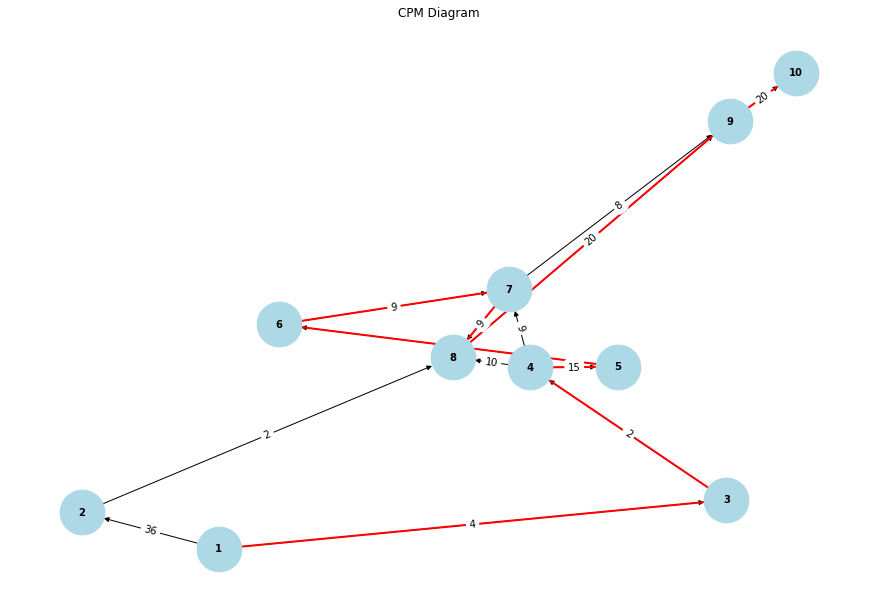

Critical Path: ['1', '3', '4', '5', '6', '7', '8', '9', '10'] with duration 83


In [2]:
from vrorRCC.cpm import create_graph, add_event, find_critical_path, visualize_graph

# Initialize the graph
graph = create_graph()
add_event(graph, '1', {})  
add_event(graph, '2', {'1': 36})  
add_event(graph, '3', {'1': 4})  
add_event(graph, '4', {'3': 2})  
add_event(graph, '5', {'4': 15}) 
add_event(graph, '6', {'5': 4})  
add_event(graph, '7', {'4': 9, '6': 9})  
add_event(graph, '8', {'2': 2, '4': 10, '7': 9})  
add_event(graph, '9', {'8': 20, '7': 8})  
add_event(graph, '10', {'9': 20})  

visualize_graph(graph)

critical_path, length = find_critical_path(graph)
print(f"Critical Path: {critical_path} with duration {length}")

Q2

Activity    TE
     1-2  10.0
     1-3   9.0
     3-4   8.0
     2-4   9.0
     2-5   7.0
     3-5   5.0
     4-5  11.0
Critical Path: ['1', '2', '4', '5'] with duration 30


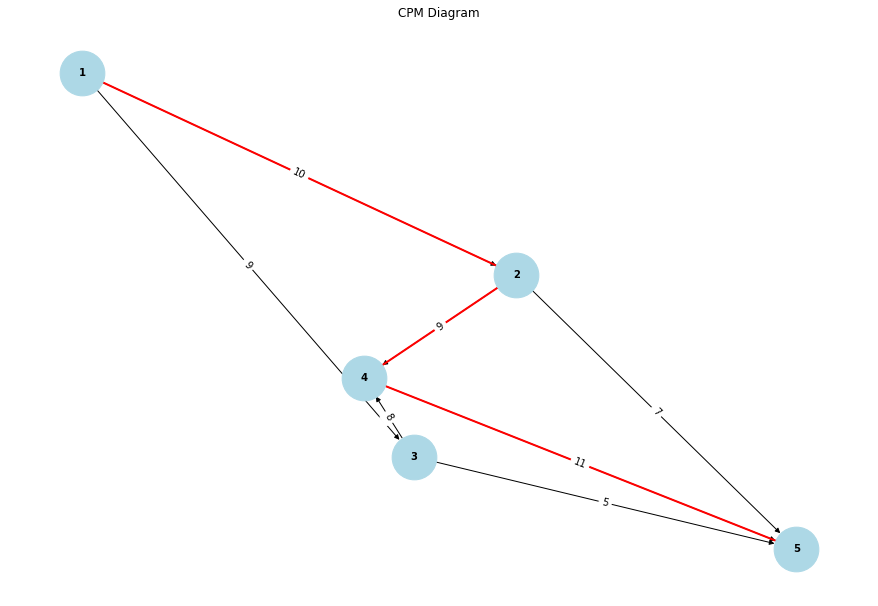

In [4]:
import networkx as ntk
import matplotlib.pyplot as plot
import pandas as pd


def create_graph():
    return ntk.DiGraph()

def add_event(graph, task, dependencies={}):
    if task not in graph:
        graph.add_node(task)
    for dep, duration in dependencies.items():
        if dep not in graph:
            graph.add_node(dep)
        graph.add_edge(dep, task, weight=duration)
       
def create_dynamic_events(event_data):
    graph = create_graph()
   
    # Add events based on the provided dictionary
    for event, dependencies in event_data.items():
        add_event(graph, event, dependencies)
   
    return graph

def find_critical_path(graph):
    critical_path = ntk.dag_longest_path(graph, weight='weight')
    critical_path_length = ntk.dag_longest_path_length(graph, weight='weight')
    return critical_path, critical_path_length

def visualize_graph(graph):
    pos = ntk.spring_layout(graph)  # Position nodes using spring layout
    plot.figure(figsize=(12, 8))
   
    # Draw the graph itself
    ntk.draw(graph, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold')
   
    # Add edge labels with durations (weights)
    edge_labels = {(u, v): f'{d["weight"]}' for u, v, d in graph.edges(data=True)}
    ntk.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
   
    # Highlight the critical path in red
    critical_path, _ = find_critical_path(graph)
    ntk.draw_networkx_edges(graph, pos, edgelist=list(zip(critical_path, critical_path[1:])), edge_color='r', width=2)
   
    plot.title("CPM Diagram")
    plot.show()

def compute_te(activities):
    data = []
    for activity, to, tl, tp in activities:
        te = (to + 4 * tl + tp) / 6
        data.append({'Activity': activity, 'TE': te})
   
    df = pd.DataFrame(data)
    return print(df.to_string(index=False))


# Calculate TE (expected time) for activities
input_ = [("1-2", 6, 9, 18), ("1-3", 5, 8, 17), ("3-4", 4, 7, 16), ("2-4", 4, 7, 22),
          ("2-5", 4, 7, 10), ("3-5", 2, 5, 8), ("4-5", 4, 10, 22)]
compute_te(input_)

# Define the event data with dependencies and durations
event_data = {
    '1': {},
    '2': {'1': 10},  
    '3': {'1': 9},
    '4': {'2': 9, '3': 8},  
    '5': {'2': 7, '3': 5, '4': 11}
}

# Create the dynamic events graph
graph = create_dynamic_events(event_data)

# Find and print the critical path and its duration
critical_path, length = find_critical_path(graph)
print(f"Critical Path: {critical_path} with duration {length}")

# Visualize the network diagram
visualize_graph(graph)


Q3

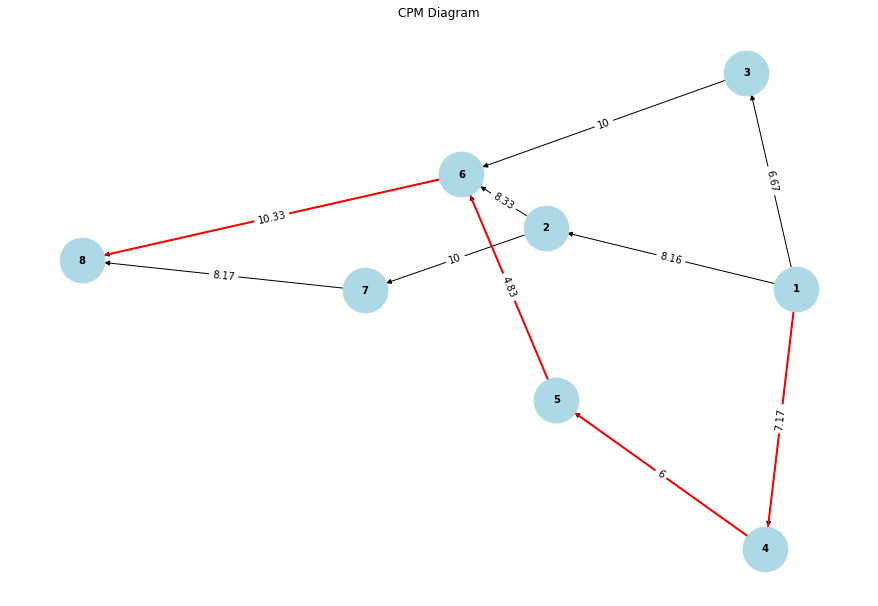

Critical Path: ['1', '4', '5', '6', '8'] with duration 28.33


In [12]:
from vrorRCC.cpm import *

graph = create_graph()
add_event(graph, '1', {})
add_event(graph, '2', {'1': 8.16})
add_event(graph, '3', {'1': 6.67})
add_event(graph, '4', {'1': 7.17})
add_event(graph, '5', {'4': 6})
add_event(graph, '6', {'2': 8.33, '3': 10, '5': 4.83})
add_event(graph, '7', {'2': 10})
add_event(graph, '8', {'7': 8.17, '6': 10.33})



visualize_graph(graph)
critical_path, length = find_critical_path(graph)
print(f"Critical Path: {critical_path} with duration {length}")


Q4

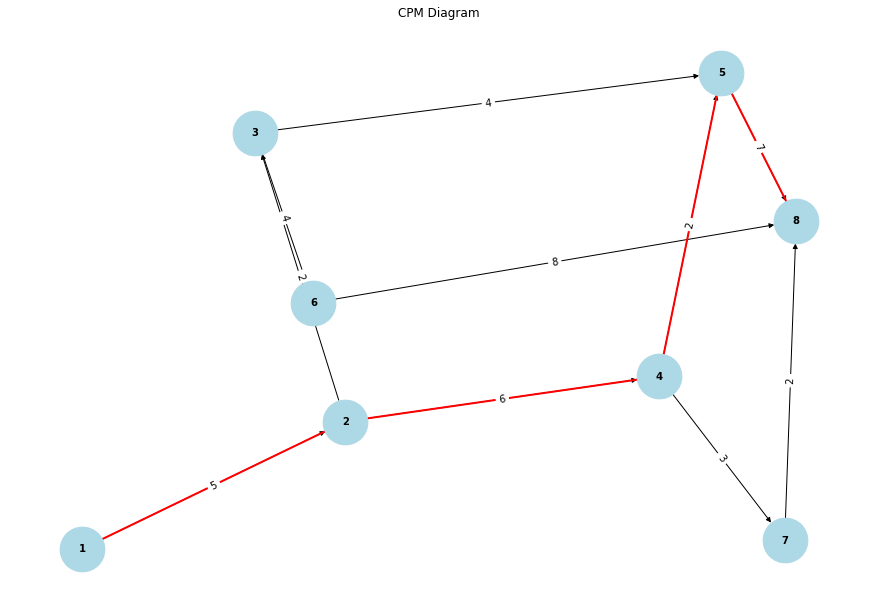

Critical Path: ['1', '2', '4', '5', '8'] with duration 20


In [10]:
from vrorRCC.cpm import *

graph = create_graph()
add_event(graph, '1', {})
add_event(graph, '2', {'1': 5})
add_event(graph, '3', {'2': 2})
add_event(graph, '4', {'2': 6})
add_event(graph, '5', {'3': 4, '4': 2})
add_event(graph, '6', {'3': 4})
add_event(graph, '7', {'4': 3})
add_event(graph, '8', {'7': 2, '6': 8, '5': 7})



visualize_graph(graph)
critical_path, length = find_critical_path(graph)
print(f"Critical Path: {critical_path} with duration {length}")

Q5

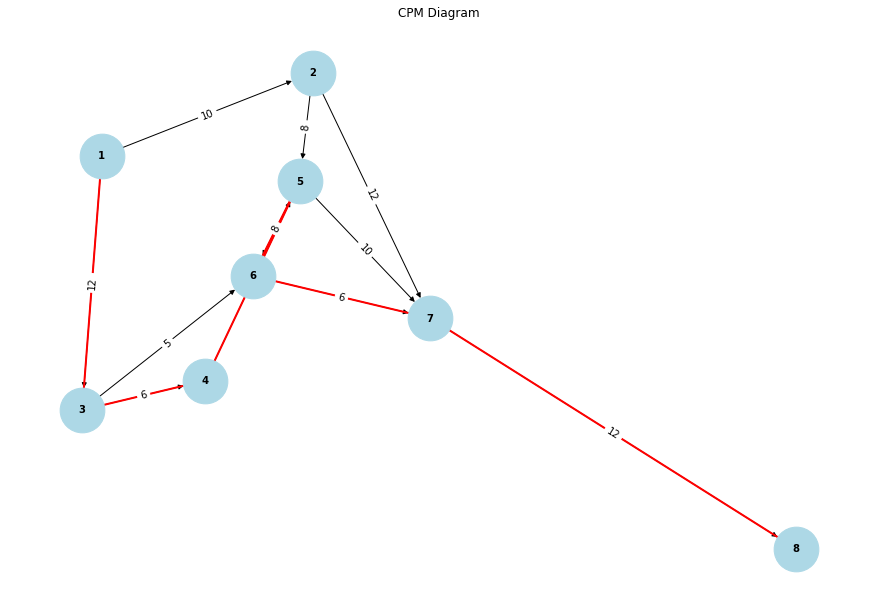

Critical Path: ['1', '3', '4', '5', '6', '7', '8'] with duration 52


In [3]:
from vrorRCC.cpm import *

graph = create_graph()
add_event(graph, '1', {})
add_event(graph, '2', {'1': 10})
add_event(graph, '3', {'1': 12})  
add_event(graph, '4', {'3': 6})  
add_event(graph, '5', {'4': 8,'2':8}) 
add_event(graph, '6', {'3': 5,'5':8})
add_event(graph, '7', {'2': 12,'5':10,'6':6})  
add_event(graph, '8', {'7': 12})  

visualize_graph(graph)
critical_path, length = find_critical_path(graph)
print(f"Critical Path: {critical_path} with duration {length}")

Q6

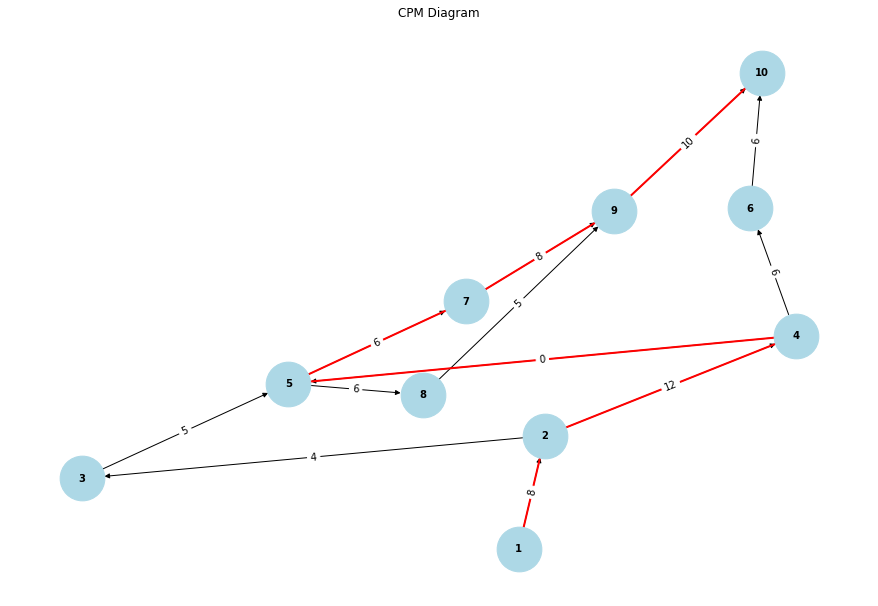

Critical Path: ['1', '2', '4', '5', '7', '9', '10'] with duration 44


In [6]:
from vrorRCC.cpm import *

graph = create_graph()
add_event(graph, '1', {})
add_event(graph, '2', {'1': 8})
add_event(graph, '3', {'2': 4})
add_event(graph, '4', {'2': 12})
add_event(graph, '5', {'3': 5})
add_event(graph, '5', {'4': 0})
add_event(graph, '6', {'4': 6})
add_event(graph, '7', {'5': 6})
add_event(graph, '8', {'5': 6})
add_event(graph, '10', {'6': 6})
add_event(graph, '9', {'7': 8})
add_event(graph, '9', {'8': 5})
add_event(graph, '10', {'9': 10})


visualize_graph(graph)
critical_path, length = find_critical_path(graph)
print(f"Critical Path: {critical_path} with duration {length}")